Importing pertinent dependencies

In [19]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

Let's load the training dataset and take a look at it

Let's take a look at the columns which have NA values

In [21]:
train = pd.read_csv("datasets/loan_prediction_approval_data/train.csv")
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [22]:
train.shape

(614, 13)

In [24]:
train.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Let's plot the variables to see if any correlations exist

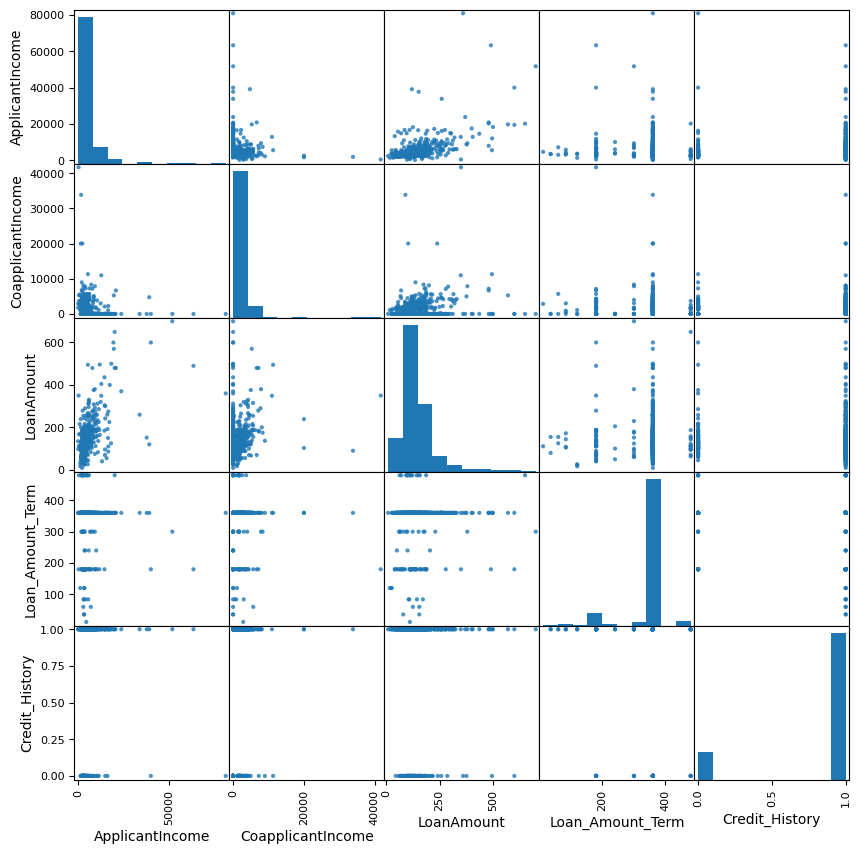

In [26]:
from pandas.plotting import scatter_matrix

def plot_all_variables(dataframe, **kw):
    scatter_matrix(dataframe, **kw)
    plt.show()

plot_all_variables(train, alpha=0.8, figsize=(10,10), diagonal="hist")

In addition to this plot, let's calculate the correlation coefficients to get a measure of correlation. The functions below will help us create a heatmap for the correlation coefficients.

In [28]:
def heatmap(data, row_labels, col_labels, ax=None, color_bar_kw=None, color_bar_label="", **kwargs):
    
    if not ax:
        ax = plt.gca()
        
    if not color_bar_kw:
        color_bar_kw = {}
        
    # Plot the heatmap
    im = ax.imshow(data, **kwargs)
    
    # Create the color bar
    color_bar = ax.figure.colorbar(im, ax=ax, **color_bar_kw)
    color_bar.ax.set_ylabel(color_bar_label, rotation=-90, va="bottom")
    
    # Show all ticks and label them with the respective list entries
    ax.set_xticks(np.arange(data.shape[1]), labels=col_labels)
    ax.set_yticks(np.arange(data.shape[0]), labels=row_labels)
    
    # Let the horizontal axes labeling appear on top
    ax.tick_params(top=True, bottom=False,
                   labeltop=True, labelbottom=False)
    
    # Rotate the tick labels and set their alignment
    plt.setp(ax.get_xticklabels(), rotation=-30, ha="right",
             rotation_mode="anchor")
    
    # Turn spines off and create white grid
    ax.spines[:].set_visible(False)
    
    ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
    ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
    ax.tick_params(which="minor", bottom=False, left=False)
    
    return im, color_bar


def annotate_heatmap(im, data=None, valfmt="{x:.2f}",
                     textcolors=("black", "white"),
                     threshold=None, **textkw):
    
    if not isinstance(data, (list, np.ndarray)):
        data = im.get_array()
        
    # Normalize the threshold to the images color range
    if threshold:
        threshold = im.norm(threshold)
    else:
        threshold = im.norm(data.max()) / 2
        
    # Set default alignment to center, but allow it to be
    # overwritten by textkw
    kw = dict(horizontalalignment="center",
              verticalalignment="center")
    kw.update(textkw)
    
    # Get the formatter in case a string is supplied
    if isinstance(valfmt, str):
        valfmt = mlp.ticker.StrMethodFormatter(valfmt)
        
    # Loop over the data and create a `Text` for each "pixel".
    # Change the text's color depending on the data.
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            kw.update(color=textcolors[int(im.norm(data[i, j]) > threshold)])
            text = im.axes.text(j, i, valfmt(data[i, j], None), **kw)
            texts.append(text)
            
    return texts

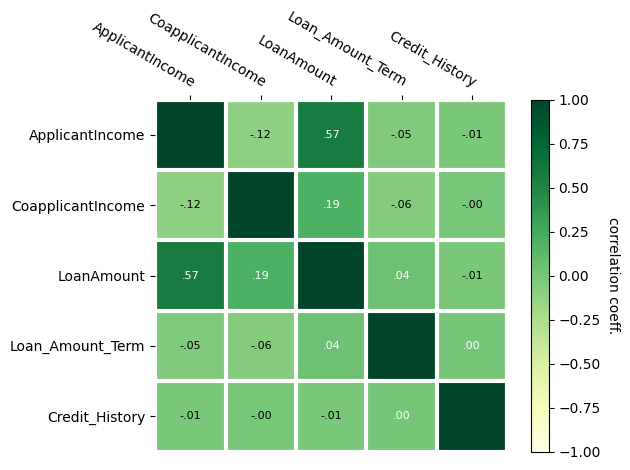

In [36]:
numeric_train_columns = train.select_dtypes(include=['number'])

corr_matrix = numeric_train_columns.corr()

im, _ = heatmap(corr_matrix, numeric_train_columns.columns, numeric_train_columns.columns,
                cmap="YlGn", vmin=-1, vmax=1,
                color_bar_label="correlation coeff.")

def func(x, pos):
    return f"{x:.2f}".replace("0.", ".").replace("1.00", "")

annotate_heatmap(im, valfmt=mpl.ticker.FuncFormatter(func), size=8)

plt.tight_layout()
plt.show()